In [22]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch

### MSE (Regression)
+ mse = sqrt(sum((ypred_i - ytrue) ** 2) / n)
+ mse for one data = |ypred - ytrue|

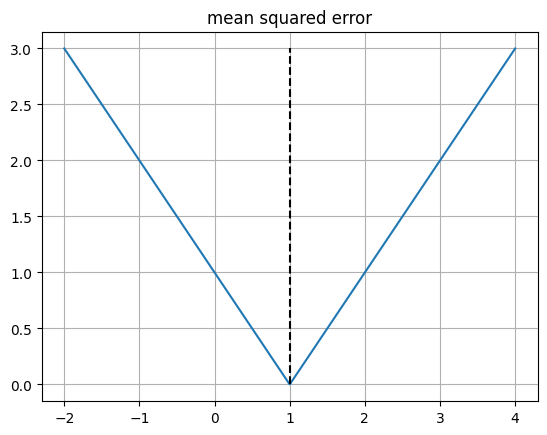

In [42]:
ytrue = 1
ypred = ytrue + np.linspace(-3, 3, 1000)
mse = np.abs(ypred - ytrue)

plt.title("mean squared error")
plt.plot(ypred, mse)
plt.vlines(ytrue, 0, max(mse), linestyles='--', color="black")
plt.grid()
plt.show()

### Entropy (Unsupervised, uncertainty)
+ Ask how many binary question to know exact class. E = sum( -p*log(p) )

D1 = [0.25, 0.25, 0.25, 0.25] -> E1 = -0.25\*log(0.25) -0.25\*log(0.25) -0.25\*log(0.25) -0.25\*log(0.25) = 2

D2 = [0.5, 0.25, 0.25, 0] -> E2 = -0.5\*log(0.5) -0.25\*log(0.25) -0.25\*log(0.25) -0\*log(0) = 1.5

In [29]:
def gauss(mean: float, sigma: float, x: np.ndarray) -> np.ndarray:
    y = 1 / (sigma * math.sqrt(2 * math.pi)) * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2))
    return y / np.sum(y)
    
def info_entropy(p: np.ndarray) -> float:
    return -np.sum(p * np.log(p))

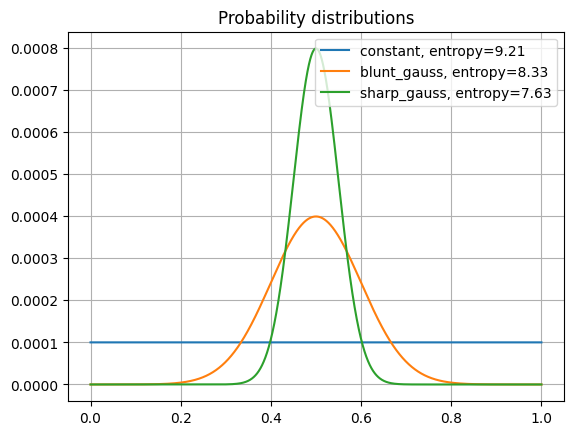

In [43]:
# continuous shannon entropy
x = np.linspace(0, 1, 10000)
y1 = [0.0001] * 10000
y2 = gauss(0.5, 0.1, x)
y3 = gauss(0.5, 0.05, x)
entropy_list = [info_entropy(y) for y in [y1, y2, y3]]

plt.title('Probability distributions')
plt.plot(x, y1, label=f'constant, entropy={entropy_list[0]:.2f}')
plt.plot(x, y2, label=f'blunt_gauss, entropy={entropy_list[1]:.2f}')
plt.plot(x, y3, label=f'sharp_gauss, entropy={entropy_list[2]:.2f}')
plt.legend()
plt.grid()

plt.show()

### Cross entropy (Classification)
+ entropy of binary classification
    + D = [p, 1-p] -> E = p*log(p) + (1-p)*log(1-p) <br><br>

+ cross entropy: distribution difference
    + CE = sum(plogq) <br><br>
    
+ cross entropy of binary classification:
    + D1 = [p, 1-p], D2 = [p+delta, 1-p-delta]
    + cross_entropy = p\*log(p+e) + (1-p)\*log(1-p-e)
    + argmin_delta cross_entropy = 0 -> delta=0 <br><br>

+ Why not using MSE
    + mse let x become 0 or 1
    + but BCE with activation:
        + activation(x=inf)=1, x must as large as possible 
        + activation(x=-inf)=0, x must as small as possible

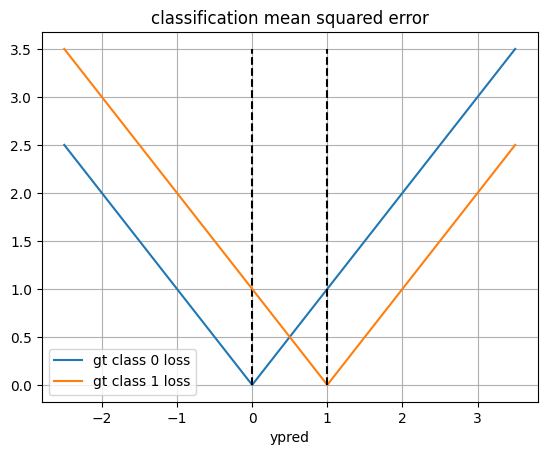

In [50]:
# MSE for classification
ytrue0 = 0
ytrue1 = 1
ypred = 0.5 + np.linspace(-3, 3, 1000)

mse0 = np.abs(ypred - ytrue0)
mse1 = np.abs(ypred - ytrue1)

plt.title("classification mean squared error")
plt.xlabel("ypred")
plt.plot(ypred, mse0, label="gt class 0 loss")
plt.vlines(ytrue0, 0, max(mse0), linestyles='--', color="black")
plt.plot(ypred, mse1, label="gt class 1 loss")
plt.vlines(ytrue1, 0, max(mse1), linestyles='--', color="black")
plt.grid()
plt.legend()
plt.show()

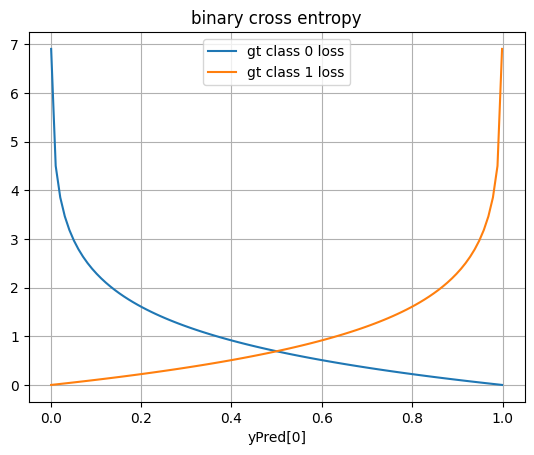

In [ ]:
# bce = -log(yPred[0]) if yTrue=class0=[1,0] else -log(yPred[1]) = -log(1 - yPred[0])
eps = 1e-3
ypred0 = np.linspace(eps, 1 - eps, 100)
#ypred1 = 1 - ypred0

bce0 = -1 * np.log(ypred0)
bce1 = -1 * np.log(1 - ypred0)

plt.title("binary cross entropy")
plt.xlabel("yPred[0]")
plt.plot(ypred0, bce0, label="gt class 0 loss")
plt.plot(ypred0, bce1, label="gt class 1 loss")
plt.legend()
plt.grid()
plt.show()

### Focal loss (Imbalance Classification)
+ Observe the BCE loss curves
    + upper left: FP
    + down right: TN
    + upper right: FN
    + down left: TP
+ definition
    + precision = TP / (TP + FP)
    + recall = TP / (TP + FN)
+ focal_loss = -alpha * (1-yPred[0]) ** gamma * log(yPred[0]) if yTrue=[1,0] else -(1-alpha)*yPred[0] ** gamma *log(1-yPred[0])
+ if value at
    + precision: smaller FP, i.e. 0 < alpha < 0.5
    + recall: smaller FN, i.e. 0.5 < alpha < 1

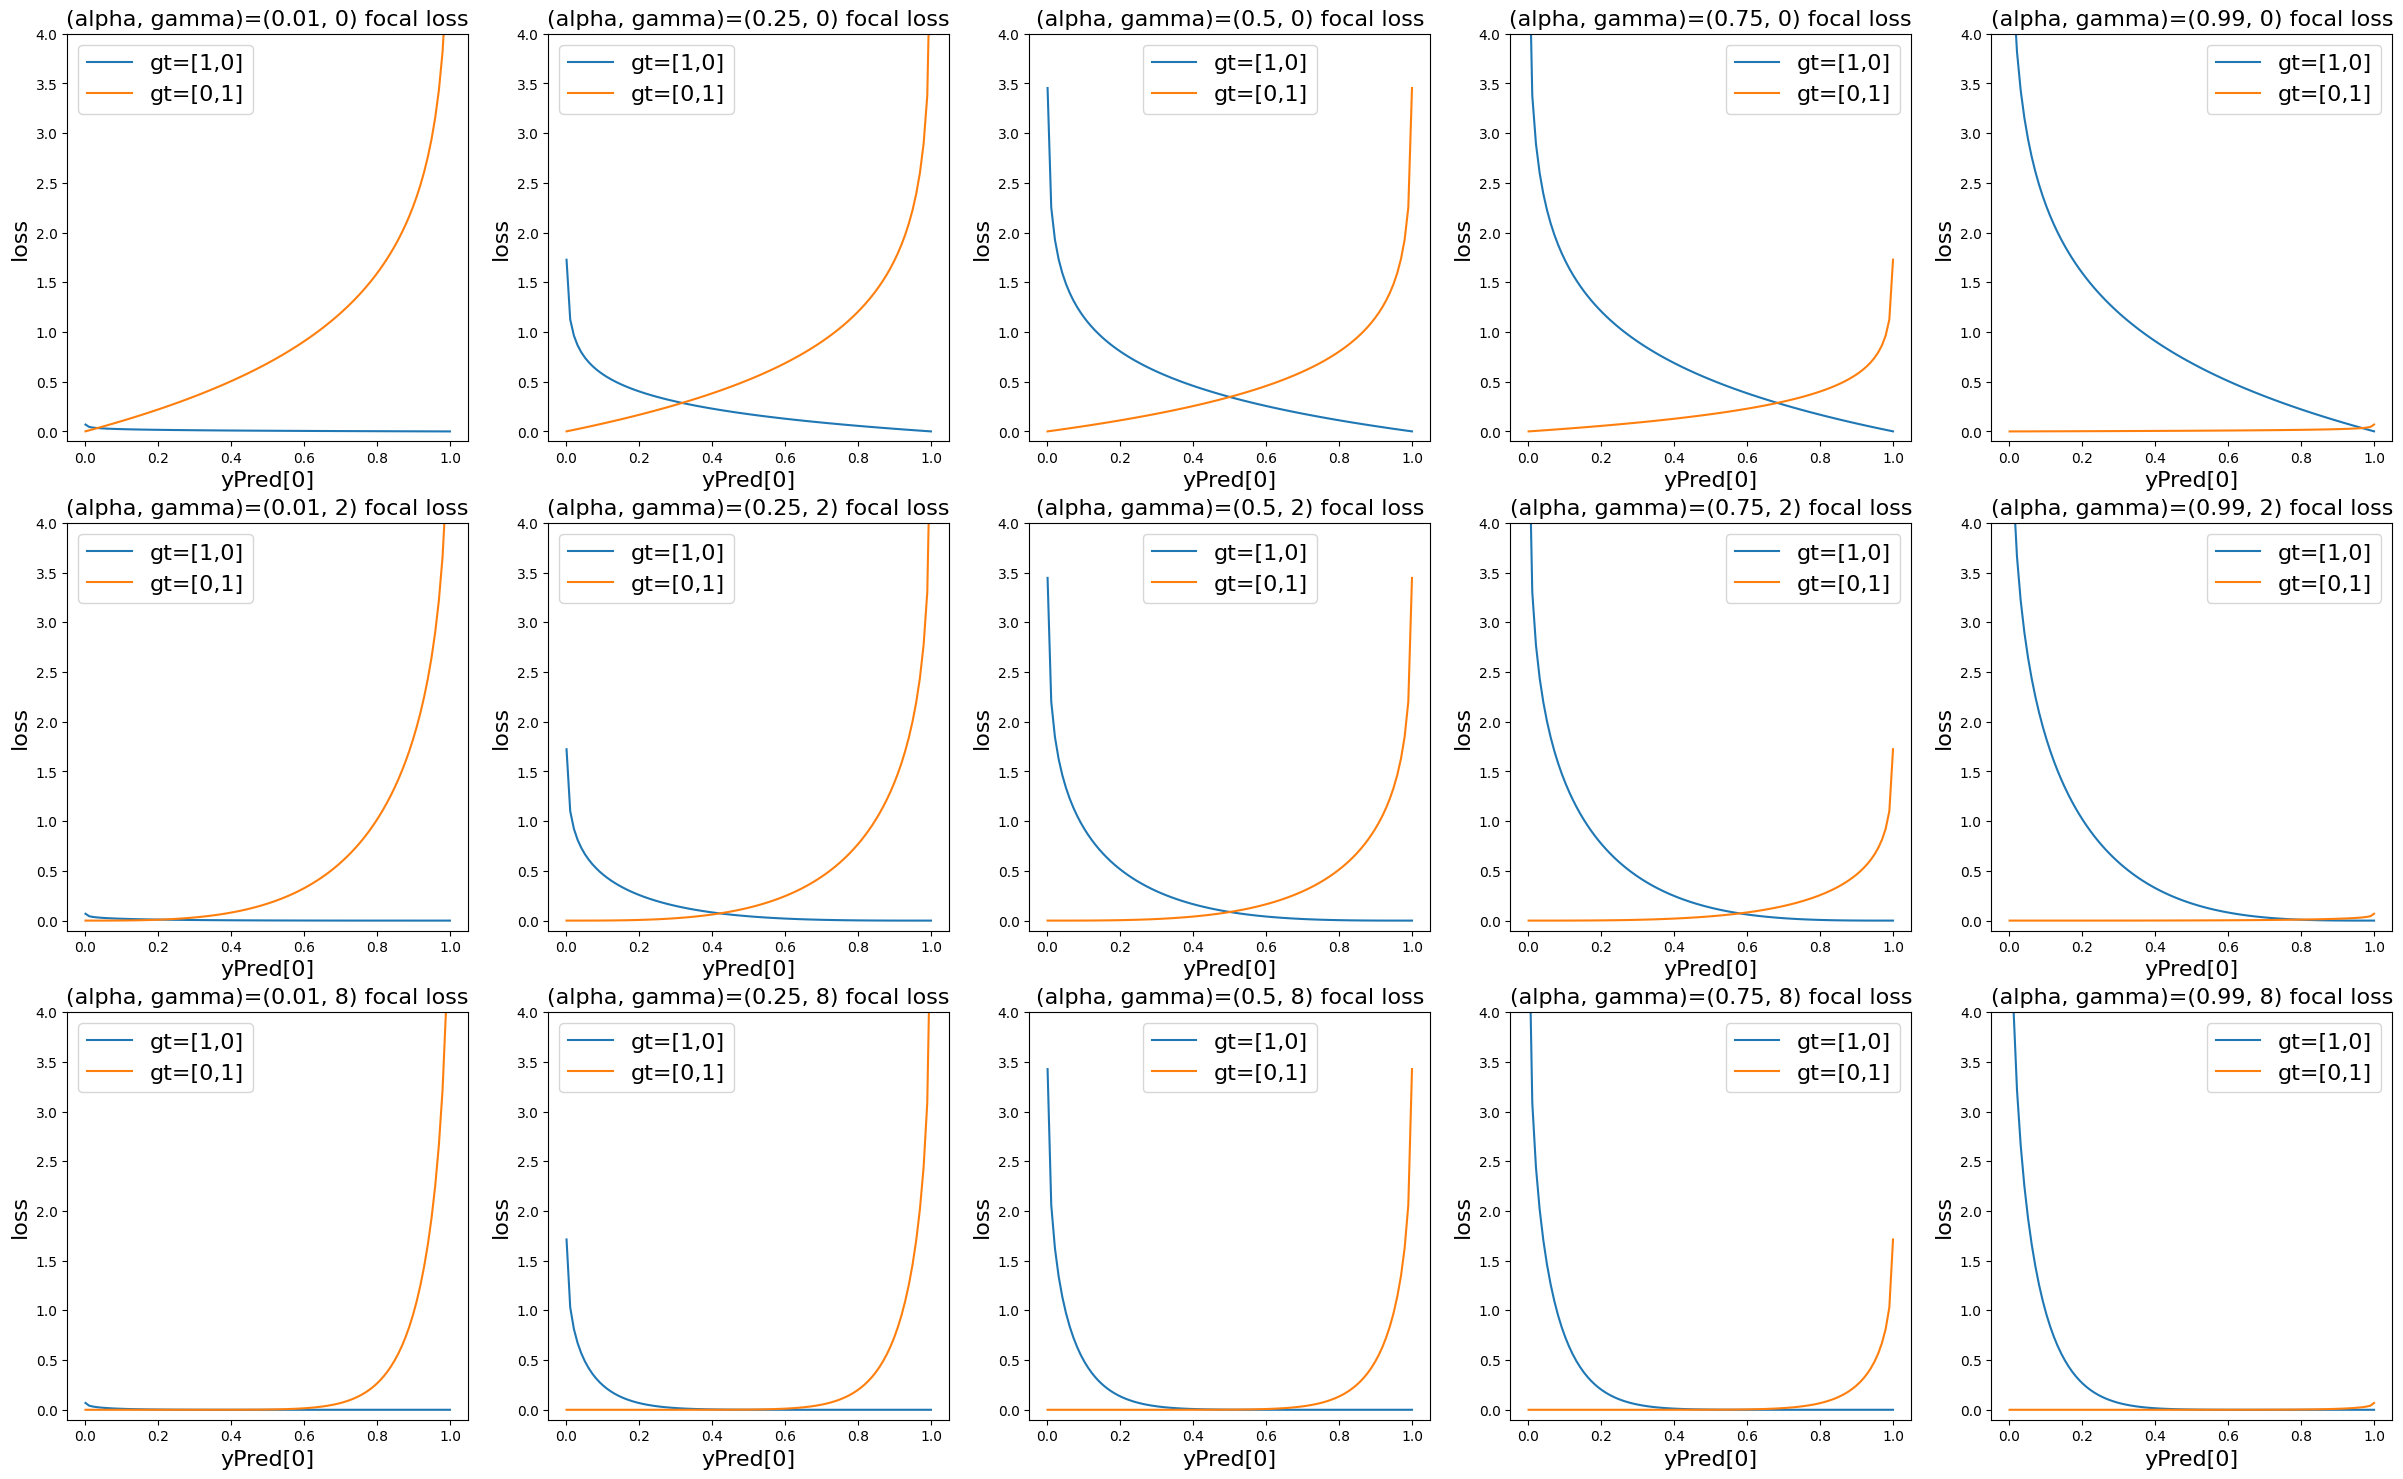

In [53]:
gammas = [0, 2, 8]                      # curvature
alphas = [0.01, 0.25, 0.5, 0.75, 0.99]  # balance precision and recall

plt.figure(figsize=(6*len(alphas),(4+2)*len(gammas)))
eps = 1e-3
ypred0 = np.linspace(eps, 1-eps, 100)
for i, gamma in enumerate(gammas):
    for j, alpha in enumerate(alphas):
        bce0 = -alpha*(1-ypred0)**gamma*np.log(ypred0)
        bce1 = -(1-alpha)*ypred0**gamma*np.log(1-ypred0)
        plt.subplot(len(gammas), len(alphas), 1 + i * len(alphas) + j)
        plt.plot(ypred0, bce0)
        plt.plot(ypred0, bce1)
        plt.title(f"(alpha, gamma)=({alpha}, {gamma}) focal loss", fontsize=16)
        plt.xlabel("yPred[0]", fontsize=16)
        plt.ylabel("loss", fontsize=16)
        plt.legend(labels=["gt=[1,0]", "gt=[0,1]"], fontsize=16)
        plt.ylim(-0.1,4)
plt.show()